In [0]:
# Dog or cat using back propagation

# **Prepare train-test data**

In [0]:
import os
import zipfile
from PIL import Image
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import seed
from random import random
from math import exp
import pandas as pd

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2019-07-11 05:18:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   169MB/s    in 0.4s    

2019-07-11 05:18:49 (169 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# Training cat pictures dir
train_cats_dir = os.path.join(train_dir, 'cats')

# Training dog pictures dir
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Validation cat pictures dir
test_cats_dir = os.path.join(test_dir, 'cats')

# Validation dog pictures dir
test_dogs_dir = os.path.join(test_dir, 'dogs')

# Print and check some
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

test_dog_fnames = os.listdir(test_dogs_dir)
test_cat_fnames = os.listdir(test_cats_dir)

['cat.358.jpg', 'cat.513.jpg', 'cat.464.jpg', 'cat.501.jpg', 'cat.627.jpg', 'cat.3.jpg', 'cat.650.jpg', 'cat.763.jpg', 'cat.585.jpg', 'cat.841.jpg']
['dog.240.jpg', 'dog.426.jpg', 'dog.663.jpg', 'dog.330.jpg', 'dog.501.jpg', 'dog.544.jpg', 'dog.350.jpg', 'dog.695.jpg', 'dog.49.jpg', 'dog.579.jpg']


In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total test cat images: 500
total test dog images: 500


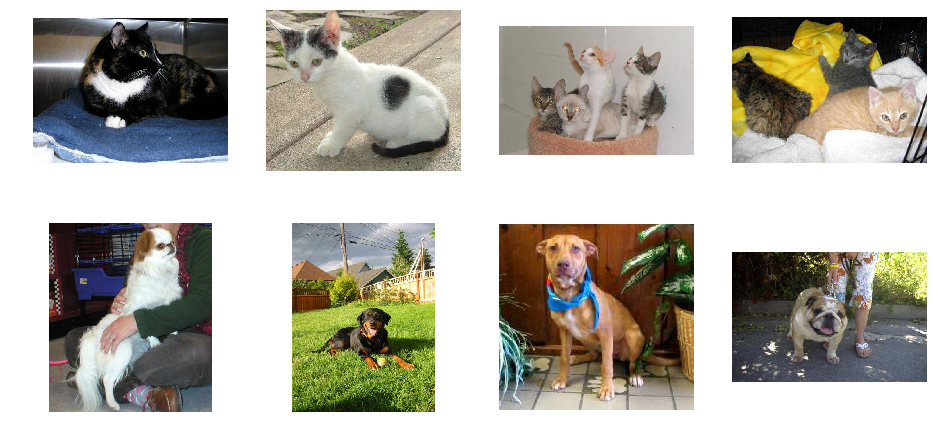

In [0]:
# To output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-4:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [0]:
# Read images as pixels and construct training data
training_data = []

# Construct training set for dogs
size = 64, 64
X_train_dogs = np.empty([1000,64, 64, 3])
y_train_dogs = np.ones([1000,])

for fname in train_dog_fnames:
  file = os.path.join(train_dogs_dir, fname)
  im = Image.open(file)
  im = im.resize(size, Image.ANTIALIAS)
  rgb_im = im.convert('RGB')
  np.append(X_train_dogs, rgb_im)

print("X_train_dogs.shape: ", X_train_dogs.shape)
print("y_train_dogs.shape: ", y_train_dogs.shape)

training_data.append([np.array(X_train_dogs), np.array(y_train_dogs)])

# Construct training set for cats
X_train_cats = np.empty([1000,64, 64, 3])
y_train_cats = np.zeros([1000,])

for fname in train_cat_fnames:
  file = os.path.join(train_cats_dir, fname)
  im = Image.open(file)
  im = im.resize(size, Image.ANTIALIAS)
  rgb_im = im.convert('RGB')
  np.append(X_train_cats, rgb_im)

print("\nX_train_cats.shape: ", X_train_cats.shape)
print("y_train_cats.shape: ", y_train_cats.shape)

training_data.append([np.array(X_train_cats), np.array(y_train_cats)])

# Full training data
shuffle(training_data)

X_train = np.array([i[0] for i in training_data])
y_train = np.array([i[1] for i in training_data])

X_train = X_train.reshape(2000, -1).T
y_train = y_train.reshape(-1, 2000)

print("\nX_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train_dogs.shape:  (1000, 64, 64, 3)
y_train_dogs.shape:  (1000,)

X_train_cats.shape:  (1000, 64, 64, 3)
y_train_cats.shape:  (1000,)

X_train.shape: (12288, 2000)
y_train.shape: (1, 2000)


In [0]:
# Read images as pixels and construct test data
test_data = []

# Construct test set for dogs
size = 64, 64
X_test_dogs = np.empty([500,64, 64, 3])
y_test_dogs = np.ones([500,])

for fname in test_dog_fnames:
  file = os.path.join(test_dogs_dir, fname)
  im = Image.open(file)
  im = im.resize(size, Image.ANTIALIAS)
  rgb_im = im.convert('RGB')
  np.append(X_test_dogs, rgb_im)

print("X_test_dogs.shape: ", X_test_dogs.shape)
print("y_test_dogs.shape: ", y_test_dogs.shape)

test_data.append([np.array(X_test_dogs), np.array(y_test_dogs)])

# Construct test set for cats
X_test_cats = np.empty([500,64, 64, 3])
y_test_cats = np.zeros([500,])

for fname in test_cat_fnames:
  file = os.path.join(test_cats_dir, fname)
  im = Image.open(file)
  im = im.resize(size, Image.ANTIALIAS)
  rgb_im = im.convert('RGB')
  np.append(X_test_cats, rgb_im)

print("\nX_test_cats.shape: ", X_test_cats.shape)
print("y_test_cats.shape: ", y_test_cats.shape)

test_data.append([np.array(X_test_cats), np.array(y_test_cats)])

# Full test data
shuffle(test_data)

X_test = np.array([i[0] for i in test_data])
y_test = np.array([i[1] for i in test_data])

X_test = X_test.reshape(1000, -1).T
y_test = y_test.reshape(-1, 1000)

print("\nX_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_test_dogs.shape:  (500, 64, 64, 3)
y_test_dogs.shape:  (500,)

X_test_cats.shape:  (500, 64, 64, 3)
y_test_cats.shape:  (500,)

X_test.shape: (12288, 1000)
y_test.shape: (1, 1000)


# **START MODEL**

In [0]:
# Feature scaling
def mean(a):
  mean = np.mean(a, dtype="float128")
  func = np.vectorize(lambda t: t - mean)
  return func(a)

def std_var(a):
  std = np.std(a, dtype="float128")
  func = np.vectorize(lambda t: t / std)
  return func(a)

def feature_scaling(X):
  X = np.apply_along_axis(mean, 1, X)
  X = np.apply_along_axis(std_var, 1, X)
  X = X[~np.any(np.isnan(X), axis=1), :]
  return X

In [0]:
def sigmoid(Z):
  A = 1 / (1 + np.exp(-Z))
  return A

def sigmoid_gradient(A):
  sig = sigmoid(A)
  return np.multiply(sig, (1 - sig))

In [0]:
def initialize_weights(num_features):
  # For 1 hidden layer
  # 1 for each feature   
  W = np.random.randn(num_features, 1)
  b = np.random.randn()
  return W, b

In [0]:
# Forward propagation
def forward_propagate(X, W, b):
  linear_transform = np.dot(W.T, X) + b
  activation = sigmoid(linear_transform)
  return activation
  

In [0]:
# Back-propagation
'''
loss function, J = 1/2m * (yhat - y)^2 where yhat = sig(A)
STEPS: IMP
  Calc derivative of J wrt activation at that layer (activation in last layer is yhat)
  Calc derivative of J wrt to weight and bias
  W = W - ådJ/dW
  b = b - ådJ/db
'''
def back_propagate(A, X, Y):
  m = X.shape[1]
  Yhat = A # final layer answer, otherwise each layer yhat is prediction which is sig(A)
  
#   Final layer
  dJ_by_dYhat = Yhat - Y
  
# Penultimate layer
  dYhat_by_dA = sigmoid_gradient(A) #since yhat is sig(A) so d(yhat) = d(sig(A))
  dJ_by_dA = dJ_by_dYhat * dYhat_by_dA
  
  # Mean of values 
  # dJ/dW -> dW, dJ/db -> db
  dW = (1/float(m)) * np.dot(X, dJ_by_dA.T)   # dA/dW = X
  db = (1/float(m)) * np.sum(dJ_by_dA)
  return dW, db

**Main func which does propagation - forward, then error correction with backward**

In [0]:
def cost_function(A, Y, m):
  #   MSE
  loss = A - Y
  sq_loss = np.square(loss)
  loss = (1/float(2*m)) * np.sum(sq_loss)
  return loss

def propagate(X, Y, W, b):
  m = X.shape[1]
  A = forward_propagate(X, W, b)
#   print("A:", A)
  #   A.shape should be (1, 2000) i.e. 1 for all features for 1 example
  
  loss = cost_function(A, Y, m)
  dW, db = back_propagate(A, X, Y)
  return loss, dW, db

In [0]:
def train(X, Y, W, b, learning_rate = 0.01, max_epochs = 1000):
#   Gradient descent
  loss_list = []
  for epoch in range(max_epochs):
    loss, dW, db = propagate(X, Y, W, b)
#     print("Epoch: ", epoch, ", loss: ", loss)
    loss_list.append([loss, epoch])

    W = W - learning_rate*dW
    b = b - learning_rate*db

  params = {
      "W": W,
      "b": b
  }
  return params, loss_list

In [0]:
if __name__ == "__main__":
  #   Column vector represents input features
  print("Initial X_train.shape: ", X_train.shape, " -> (features, examples)")
  
  X_train_scaled = feature_scaling(X_train) #remove features which have value nan
  print("\nAfter feature scaling:")
  print("X_train_scaled shape: ", X_train_scaled.shape)
  print("y_train shape: ", y_train.shape)
  
  # 1 layer with neurons = no of training ex
  W, b = initialize_weights(X_train_scaled.shape[0])
  print("\nW initial shape: ", W.shape)
  print("b initial: ", b)

Initial X_train.shape:  (12288, 2000)  -> (features, examples)

After feature scaling:
X_train_scaled shape:  (12285, 2000)
y_train shape:  (1, 2000)

W initial shape:  (12285, 1)
b initial:  1.5540239765813582


In [0]:
print(y_train.shape)
print(X_train_scaled.shape)
params, loss_list = train(X_train_scaled, y_train, W, b)

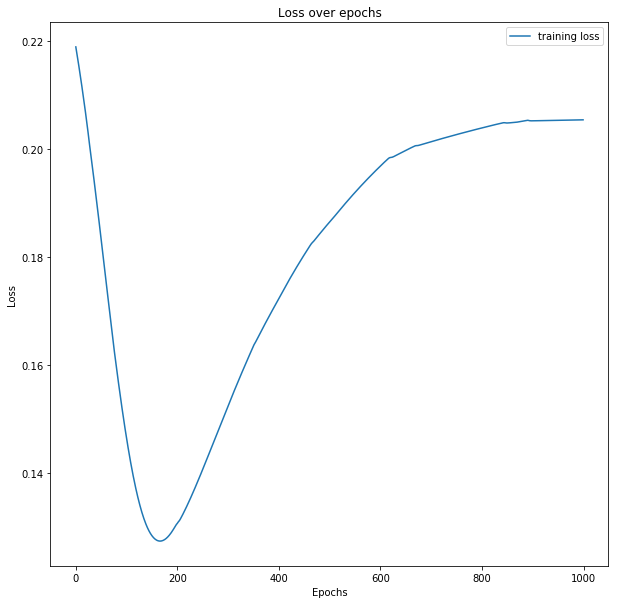

In [0]:
# Plot loss over epoch
x_axis = np.array([i[1] for i in loss_list]) # epoch
y_axis = np.array([i[0] for i in loss_list]) # loss
plt.figure(figsize=(10,10))
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(x_axis, y_axis, label="training loss")
plt.legend(loc="best")

In [0]:
  print("\nAfter training:")
  print("W shape: ", W.shape)
  print("b: ", b)


After training:
W shape:  (12285, 1)
b:  1.5540239765813582


In [0]:
def predict(X, params):
  W = params["W"]
  b = params["b"]
  linear_transform = np.dot(W.T, X) + b
  A = sigmoid(linear_transform)
  pred_value = np.where(A >= 0.5, 1, 0) 
  return pred_value

In [0]:
def accuracy(Yhat, Y):
  return np.sum(Y == Yhat, dtype = "float")/len(Y)

In [0]:
#   Accuracy on training set
  X_true = X_train_scaled
  y_true = y_train.reshape(-1,1)
  
  y_estimate = predict(X_true, params).reshape(-1,1)
  print(y_estimate.shape)
  print(y_true.shape)
  
  acc = accuracy(y_estimate, y_true)
  
  print(acc)

(1, 2000)
(2000, 1)
(2000, 1)
0.5085


In [0]:
# #   Accuracy on test set
#   X_true = feature_scaling(X_test)
#   y_true = y_test.reshape(-1,1)
#   W = params["W"][:1000]
#   params["W"] = W
#   y_estimate = predict(X_true, params).reshape(-1,1)
  
#   acc = accuracy(y_estimate, y_true)
  
#   print(acc)